In [1]:
import numpy as np
from tslearn.preprocessing import *
from tslearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline
%load_ext rpy2.ipython
%R require(dtw)

/home/jgs/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: dtw

  warnings.warn(x, RRuntimeWarning)
/home/jgs/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: proxy

  warnings.warn(x, RRuntimeWarning)
/home/jgs/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘proxy’


  warnings.warn(x, RRuntimeWarning)
/home/jgs/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    as.dist, dist


  warnings.warn(x, RRuntimeWarning)
/home/jgs/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:base’:

    as.matrix


  warnings.warn(x, RRuntimeWarning)
/home/jgs/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWa

array([1], dtype=int32)

In [2]:
sl = np.loadtxt('cds_2_only_simu.txt')
rl = np.loadtxt('cds_2_real.txt')
sl = np.array([i for i in sl for j in range(10)])
#sl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(sl)[0].T[0]
#rl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(rl)[0].T[0]

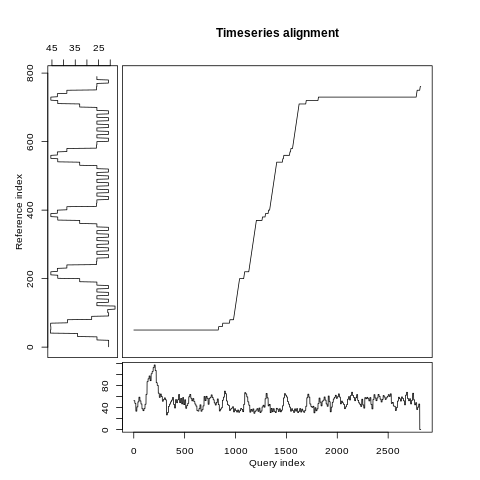

In [5]:
%%R -i sl -i rl
alignmentOBE <-
   dtw(rl,sl,
       keep=TRUE,step=asymmetric,
       open.end=TRUE,open.begin=TRUE);
write.table(data.frame(alignmentOBE$index2),'cds_2_obe.txt', sep = '\t')
plot(alignmentOBE,type="threeway")

In [65]:
obe = pd.read_table('cds_2_obe.txt')

v = obe['alignmentOBE.index2'].tolist()
count = sorted([(i, v.count(i)) for i in set(v)], key=lambda x: x[0])
bound = [i[0] for i in count if i[1] > 500]

start = (obe[obe == bound[0]].dropna().index.max()//10)*10
end = (obe[obe == bound[1]].dropna().index.min()//10)*10

sl = np.loadtxt('cds_2_only_simu.txt')
rl = np.loadtxt('cds_2_real.txt')[start:end]
sl = np.array([i for i in sl for j in range(10)])
sl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(sl)[0].T[0]
rl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(rl)[0].T[0]

analysed deletions are [5, 10, 11, 19, 21, 38, 39, 55, 56, 72, 73], totally 11
deletion rate is 0.13924050632911392
analysed insertions are [2, 5, 6, 10, 13, 14, 18, 19, 20, 21, 24, 36, 37, 42, 44, 45, 56, 59, 62, 67, 68, 74, 79, 82, 83, 84, 85, 91, 93, 95, 96], totally 31
inertions in ref positions are [2, 4, 5, 9, 13, 13, 16, 16, 16, 16, 18, 31, 31, 35, 36, 36, 48, 50, 52, 58, 58, 63, 67, 69, 69, 69, 69, 76, 77, 78, 78]
insertion rate is 0.3924050632911392


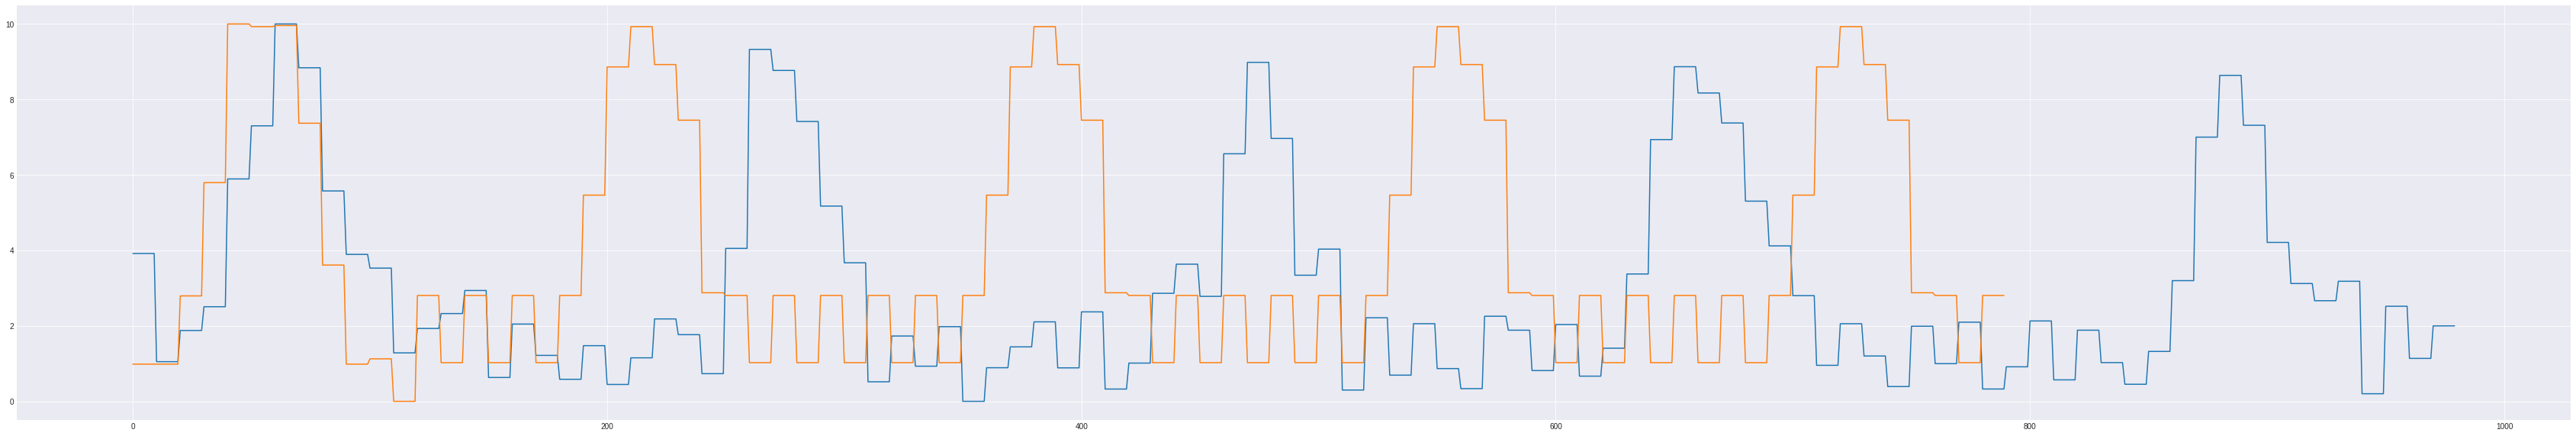

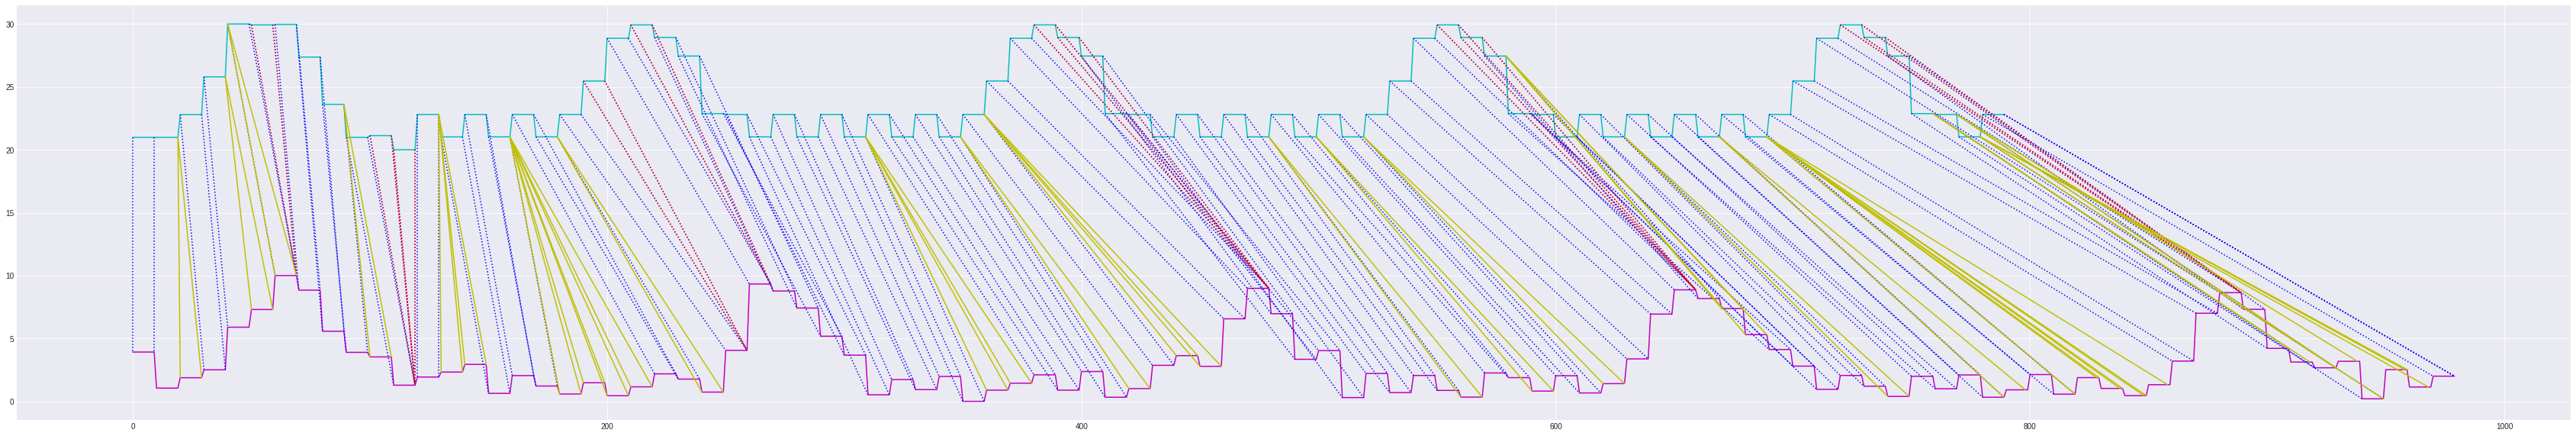

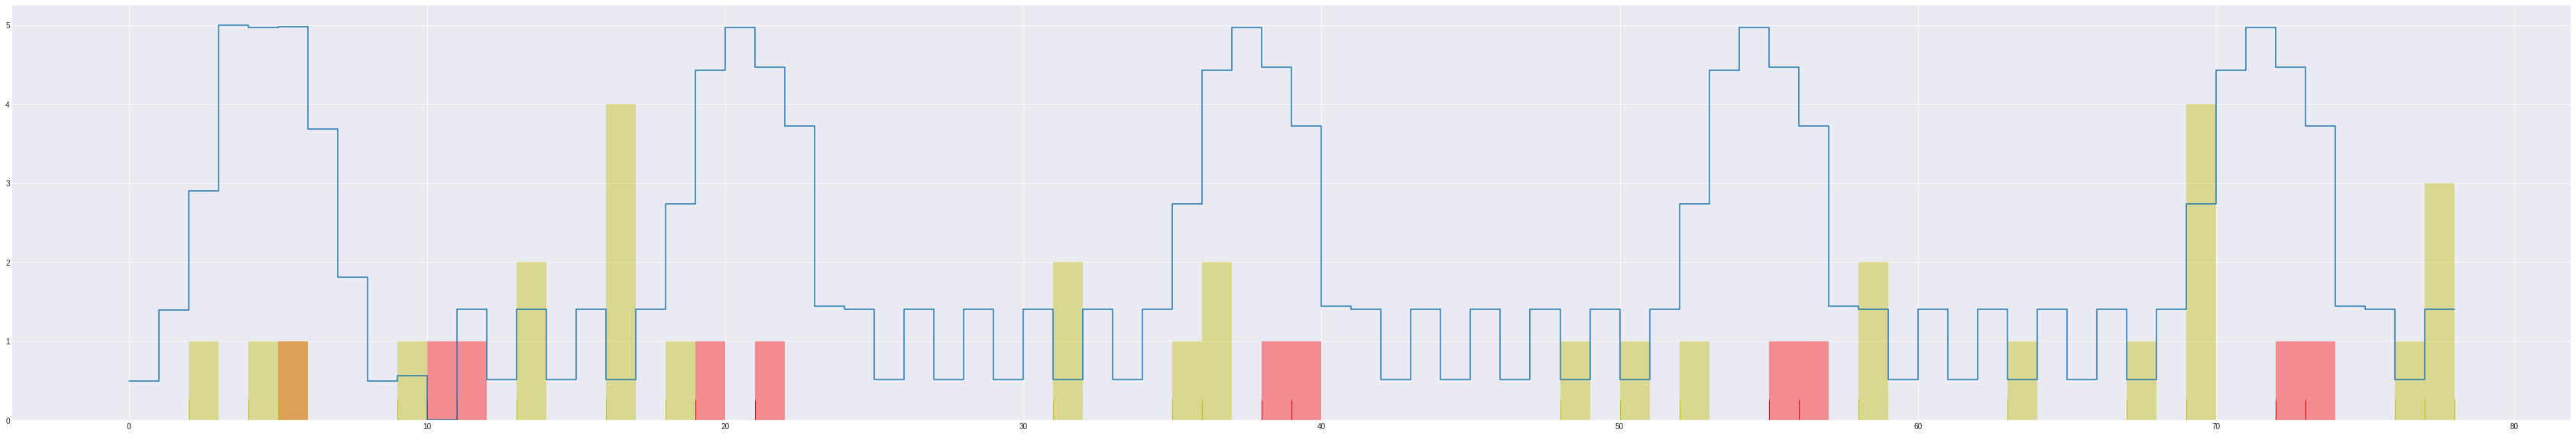

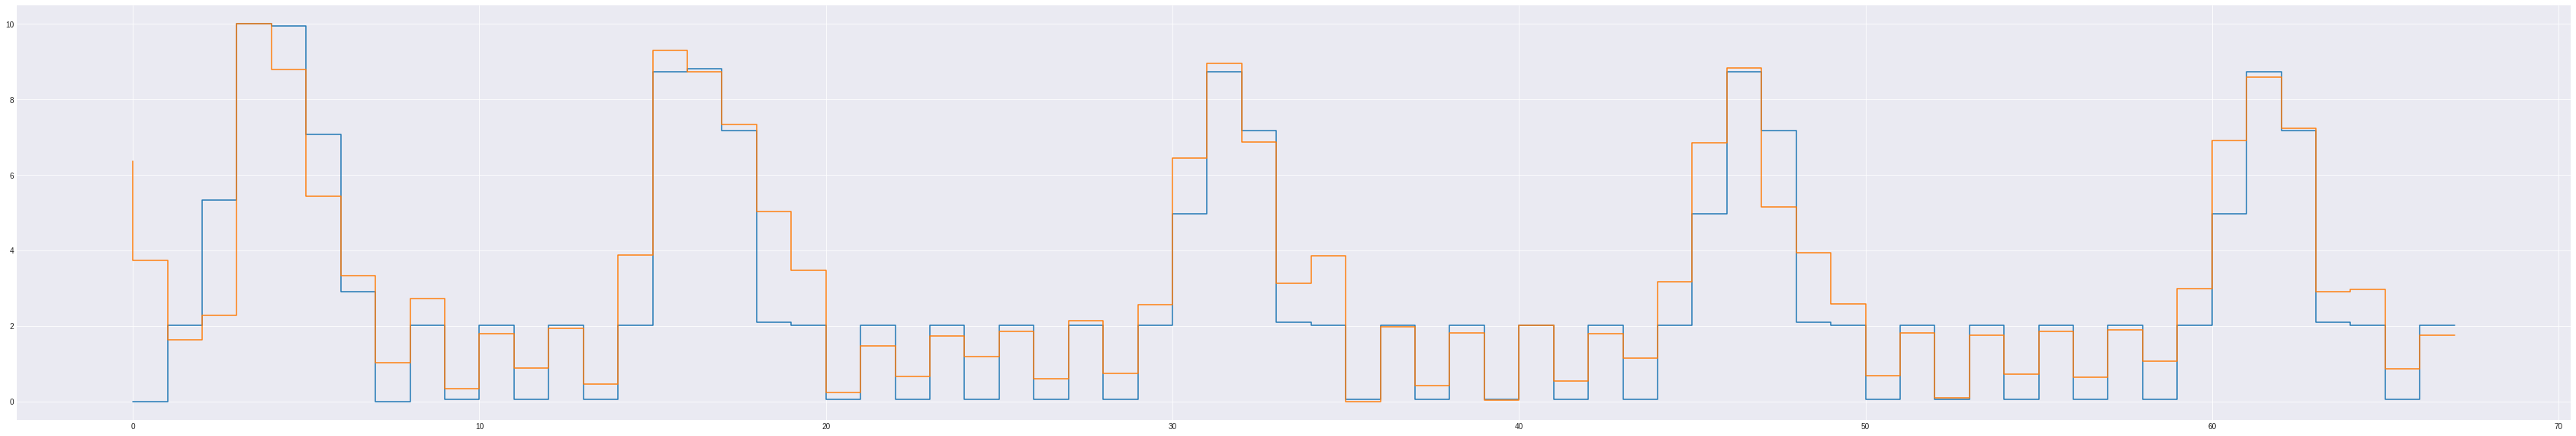

In [120]:
#block test
s_1 = sl; s_2 = rl
n = int(len(sl)/10)
sn = 10
mx = 20
lg = len(sl) - 1





##processing

path, sim = metrics.dtw_path(s_1, s_2)

matrix_path = numpy.zeros((len(s_1), len(s_2)), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1
    
    
deletion = []
for idx, i in enumerate(np.linspace(0,n*sn,n+1)[:n]):
    i = int(i)
    if abs(matrix_path[i+sn-1].argmax() - matrix_path[i].argmax()) < 3:
        deletion = deletion + [idx]

        

plt.figure(figsize=(60, 10))
plt.plot(rl);
plt.plot(sl);        

plt.figure(figsize=(60, 10))
st = s_1 + mx
plt.plot(st, 'c')
plt.plot(s_2, 'm')

rag = np.linspace(0,n*sn,n+1)
pos = []
for i in rag:
    if i + 9 < lg:
        pos = pos + [i, i + 9]
    else:
        pos = pos + [i, lg]
for i in pos:
    if i not in deletion:
        if i != len(matrix_path):
            #print(i, matrix_path[int(i)].argmax())
            idx = int(matrix_path[int(i)].argmax())
            plt.plot([i, idx], [st[int(i)],s_2[idx]], 'b', linestyle=':')
        else:
            i = i -1
            idx = int(matrix_path[int(i)].argmax())
            plt.plot([i, idx], [st[int(i)],s_2[idx]], 'b', linestyle=':')
        


        

pos1 = []
for i in deletion:
    if i*sn + 9 > sn*n-1:
        pos1 = pos1 + [i*sn, sn*n-1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path):
        #print(i, matrix_path[int(i)].argmax())
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]], 'r', linestyle=':')
    else:
        i = i - 1
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]], 'r', linestyle=':')
        
#print('real deletions are     %s'%(s[3]))
print('analysed deletions are %s, totally %s'%(deletion, len(deletion)))
print('deletion rate is %s'%(len(deletion)/n))
#inter = set(s[3]).intersection(set(deletion))
#print('TP are                 %s'%(sorted(list(inter))))


insertion = []
insertion_ref = []
matrix_path_t = matrix_path.T
lg = len(rl) - 1
rln = len(rl)//10
for idx, i in enumerate(np.linspace(0,rln*sn,rln+1)[:rln]):
    i = int(i)
    if abs(matrix_path_t[i+sn-1].argmax() - matrix_path_t[i].argmax()) < 3:
        insertion = insertion + [idx]
        insertion_ref = insertion_ref + [matrix_path_t[i+sn-1].argmax()//10 + 1]
        
#plt.figure(figsize=(60, 10))
#st = s_1 + mx
#plt.plot(st, 'm')
#plt.plot(s_2, 'c')
pos1 = []
for i in insertion:
    if i*sn + 9 > lg:
        pos1 = pos1 + [lg, lg + 1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path):
        #print(i, matrix_path_t[int(i)].argmax())
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [s_2[i], st[int(idx)]], 'y')
    else:
        i = i - 1
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [s_2[i], st[int(idx)]], 'y')
        
#print('real insertions are     %s'%(s[3]))
print('analysed insertions are %s, totally %s'%(insertion, len(insertion)))
print('inertions in ref positions are %s' % (insertion_ref))
print('insertion rate is %s'%(len(insertion)/n))
#inter = set(s[3]).intersection(set(insertion))
#print('TP are                 %s'%(sorted(list(inter))))

plt.figure(figsize=(60, 10))
step = TimeSeriesScalerMinMax(min=0, max=5).fit_transform(np.loadtxt('cds_2_only_simu.txt'))[0].T[0]
plt.step(range(len(step)), step)
sns.distplot(deletion, bins=range(n), color='r',kde=False, rug=True);
sns.distplot(insertion_ref, bins=range(n), color='y',kde=False, rug=True);

se = np.loadtxt('cds_2_only_simu.txt')
re = np.loadtxt('cds_2_real.txt')[start-1:end+1][::10]
se = se[[i for i in range(len(se)) if (i not in deletion) ]]
re = re[[i for i in range(len(re)) if (i not in insertion)]]
se = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(se)[0].T[0]
re = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(re)[0].T[0]
plt.figure(figsize=(60, 10))
plt.step(range(len(se)), se)
plt.step(range(len(re)), re);